# Метод половинного деления

In [1]:
def calc_f(x):
    return -1.38*x**3 - 5.42*x**2 + 2.57*x + 10.95

In [2]:
import math
import numpy

In [19]:

def methodBisection(a, b, eps):
    global n
    n = n + 1
    if ( n == 1 ) and ( calc_f(a)/calc_f(b) > 0 ):
        return None
    
    if ( abs(calc_f(a)) < eps ):
        return a
    if ( abs(calc_f(b)) < eps  ):
        return b
    if ( abs(calc_f((a + b)/2.0)) < eps ):
        return (a + b)/2.0
    x = (a + b)/2.0
    if ( calc_f(a)/calc_f(x) < 0):
        return methodBisection(a, x, eps)
    else: 
        return methodBisection(x, b, eps)

In [27]:
def validation(a, b,eps):
    global n
    if (a > b):
        print("Координата конца больше координаты начала? :С")
        exit(0)
    
    print("Введите: 1 - для вывода ответа на экран; 2 - для сохранения ответа в файл.")
    
    err = True
    while (err == True):
        kuda_write = input()
        if (kuda_write == '1' or kuda_write == '2'):
            err = False
        else:
            print(":(")
    
    if (kuda_write == '1'):
        print ('\nИнтервал [', a, ',', b, '], погрешность =', eps)

        print ("\nОтвет:")

        ans = methodBisection(a, b, eps)
        if (ans is None): 
            print("Корня нет или больше одного")
        else: 
            print('x =', ans)
            print('f(x) =', calc_f(ans))
            print('количество итераций:', n)
        return
    
    if (kuda_write == '2'):
        out_file = open("answer_bisection.txt", "w")
        str_ans = 'Интервал [' + str(a) + ',' +  str(b) + '], погрешность = ' + str(eps) + "\nОтвет:"
        

        ans = methodBisection(a, b, eps)
        if (ans is None): 
            str_ans += "Корня нет или больше одного"
        else: 
            str_ans += 'x = ' + str(ans) + '\nf(x) = ' + str(calc_f(ans)) + '\nколичество итераций:' + str(n)
        out_file.write(str_ans)
        return

# Данные с файла

В файле `data_bisection.txt` должны находиться 3 значения в разных строках:
1. координата начала интервала
2. координата конца интервала
3. погрешность

In [14]:
with open('data_bisection.txt', 'r') as myfile:
    content = myfile.readlines()
    
content = [x.strip() for x in content] 

try:
    a = float(content[0])
    b = float(content[1])
    eps = float(content[2])

except Exception:
    ("Проверьте правильность данные в файле")
    
n = 0
validation(a, b, eps)


Введите: 1 - для вывода ответа на экран; 2 - для сохранения ответа в файл.
1

Интервал [ 1.0 , 2.0 ], погрешность = 1e-06

Ответ:
x = 1.4066400527954102
f(x) = 5.292290961023127e-07
количество итераций: 20


# Данные с клавиатуры

In [28]:
err = True

while (err == True):
    try:
        print ("Введите координату начала:")
        a = float(input())
        print ("Введите координату конца:")
        b = float(input())
        if (a > b):
            print("Координата конца больше координаты начала? :С")
            raise Exception("")
        print ("Введите погрешность:")
        eps = float(input())
        err = False
    except Exception:
        print("Ошибка. Проверьте правильность введенных данных\n")

n = 0

validation(a, b, eps)

Введите координату начала:
-1
Введите координату конца:
1
Введите погрешность:
0.0000001
Введите: 1 - для вывода ответа на экран; 2 - для сохранения ответа в файл.
1

Интервал [ -1.0 , 1.0 ], погрешность = 1e-07

Ответ:
Корня нет или больше одного


# График функции

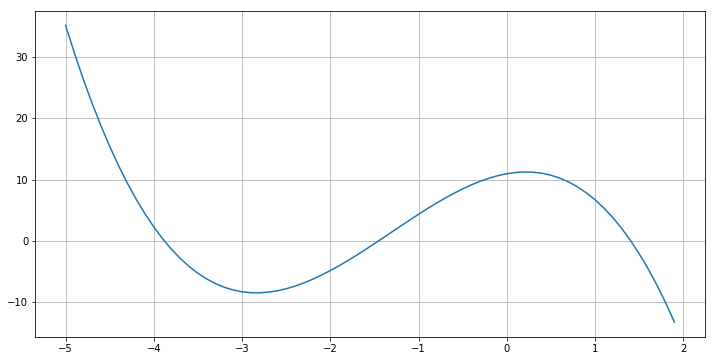

In [31]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.array(np.arange(-5, 2, step=0.1)) 
y =  calc_f(x)
plt.figure(figsize=(12,6))
plt.plot(x, y) 
plt.grid()
plt.show()